To run Plaidml, we need to run the following script inside plaidML environment:
    > plaidml-setup
    > select the amd gpu
    > save

In [1]:
import numpy as np
import os
import time

## GPU

In [ ]:
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

import keras
import keras.applications as kapp
from keras.datasets import cifar10

(x_train, y_train_cats), (x_test, y_test_cats) = cifar10.load_data()
batch_size = 8
x_train = x_train[:batch_size]
x_train = np.repeat(np.repeat(x_train, 7, axis=1), 7, axis=2)
model = kapp.VGG19()
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Running initial batch (compiling tile program)")
y = model.predict(x=x_train, batch_size=batch_size)

print("Timing inference...")
start = time.time()
for i in range(10):
    y = model.predict(x=x_train, batch_size=batch_size)
print("Ran in {} seconds".format(time.time() - start))

## CPU

In [ ]:
import keras
import keras.applications as kapp
from keras.datasets import cifar10


(x_train, y_train_cats), (x_test, y_test_cats) = cifar10.load_data()
batch_size = 8
x_train = x_train[:batch_size]
x_train = np.repeat(np.repeat(x_train, 7, axis=1), 7, axis=2)
model = kapp.VGG19()
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Running initial batch (compiling tile program)")
y = model.predict(x=x_train, batch_size=batch_size)

print("Timing inference...")
start = time.time()
for i in range(10):
    y = model.predict(x=x_train, batch_size=batch_size)
print("Ran in {} seconds".format(time.time() - start))

Using TensorFlow backend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\Users\Natan Guedes\Documents\Dev\PFC\pfc\plaidml\lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Natan Guedes\AppData\Local\Temp\ipykernel_25712\588395769.py", line 1, in <module>
    import keras
  File "c:\Users\Natan Guedes\Documents\Dev\PFC\pfc\plaidml\lib\site-packages\keras\__init__.py", line 3, in <module>
    from . import utils
  File "c:\Users\Natan Guedes\Documents\Dev\PFC\pfc\plaidml\lib\site-packages\keras\utils\__init__.py", line 6, in <module>
    from . import conv_utils
  File "c:\Users\Natan Guedes\Documents\Dev\PFC\pfc\plaidml\lib\site-packages\keras\utils\conv_utils.py", line 9, in <module>
    from .. import backend as K
  File "c:\Users\Natan Guedes\Documents\Dev\PFC\pfc\plaidml\lib\site-packages\keras\backend\__init__.py", line 89, in <module>
    from .tensorflow_backend import *
  File "c:\Users\Natan Guedes\Documents\

: 

Epoch 1/100


c:\Users\Natan Guedes\Documents\Dev\PFC\pfc\py9\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


603/603 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - loss: 0.0208 - val_loss: 0.0154
Epoch 2/100
603/603 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0114 - val_loss: 0.0084
Epoch 3/100
603/603 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0062 - val_loss: 0.0052
Epoch 4/100
603/603 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0045 - val_loss: 0.0065
Epoch 5/100
603/603 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0037 - val_loss: 0.0039
Epoch 6/100
603/603 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 7/100
603/603 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 8/100
603/603 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 9/100
603/603 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 10/100
603/603 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 11/100
603/603 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 12/100
603/603 ━━━━━━━━━━━━

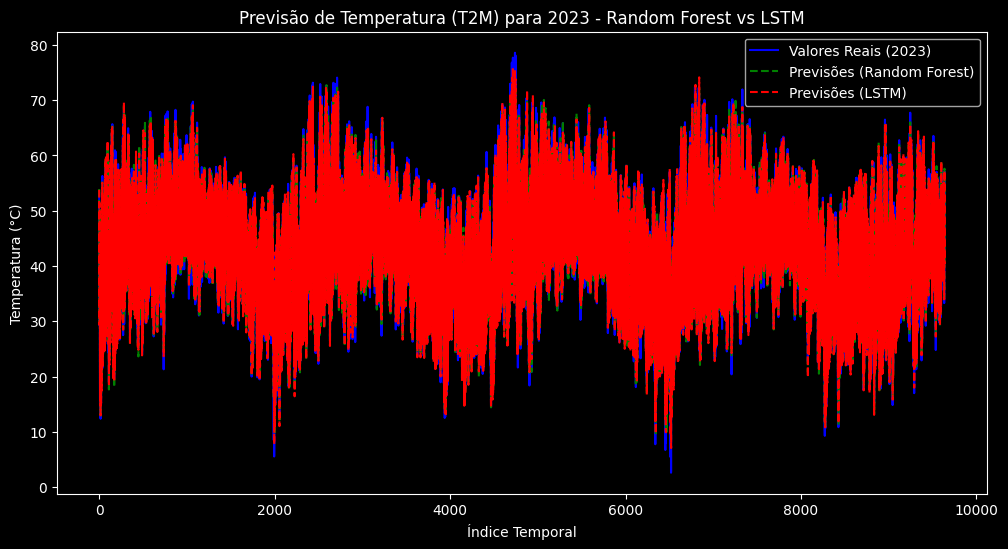

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Certifique-se de que os dados X_train, X_test, y_train, y_test já estão preparados.
# Normalização assumida como anteriormente configurada.

# Reconstruir o modelo LSTM com melhorias
model_lstm = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compilação com otimizador ajustado
model_lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Treinamento com Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train, y_train, epochs=100, batch_size=64, 
                               validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Previsões do modelo LSTM
lstm_predictions_scaled = model_lstm.predict(X_test)
lstm_predictions = scaler_y.inverse_transform(lstm_predictions_scaled.reshape(-1, 1))

# Invertendo a escala dos valores reais
y_test_real = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Treinamento do Random Forest com parâmetros ajustados
rf_model = RandomForestRegressor(n_estimators=200, max_depth=30, random_state=42)
rf_model.fit(X_train.reshape(X_train.shape[0], -1), y_train.ravel())

# Previsões do Random Forest
rf_predictions_scaled = rf_model.predict(X_test.reshape(X_test.shape[0], -1))
rf_predictions = scaler_y.inverse_transform(rf_predictions_scaled.reshape(-1, 1))

# Cálculo das métricas
mae_lstm = mean_absolute_error(y_test_real, lstm_predictions)
rmse_lstm = np.sqrt(mean_squared_error(y_test_real, lstm_predictions))
mae_rf = mean_absolute_error(y_test_real, rf_predictions)
rmse_rf = np.sqrt(mean_squared_error(y_test_real, rf_predictions))

print(f"LSTM - MAE: {mae_lstm:.4f}, RMSE: {rmse_lstm:.4f}")
print(f"Random Forest - MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}")

# Plot comparativo
plt.figure(figsize=(12, 6))
plt.plot(y_test_real, label='Valores Reais (2023)', color='blue')
plt.plot(rf_predictions, label='Previsões (Random Forest)', color='green', linestyle='dashed')
plt.plot(lstm_predictions, label='Previsões (LSTM)', color='red', linestyle='dashed')
plt.title('Previsão de Temperatura (T2M) para 2023 - Random Forest vs LSTM')
plt.xlabel('Índice Temporal')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()
